In [1]:
import pyspark
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
from google.cloud import bigquery 
import warnings
import os

# Start A Spark Session

In [2]:
# Initialise a sparksession with Hive Store Support
warnings.filterwarnings('ignore')


spark = SparkSession.builder \
        .master('local[4]')\
        .enableHiveSupport()\
        .appName('Research_Notebook')\
        .config('spark.sql.execution.arrow.pyspark.enabled', True) \
        .config('spark.driver.memory','32G') \
        .config('spark.ui.showConsoleProgress', True) \
        .config('spark.sql.repl.eagerEval.enabled', True) \
        .config('spark.jars', '/home/jovyan/work/Downloads/spark-bigquery-with-dependencies_2.12-0.22.0.jar') \
        .getOrCreate()

21/11/01 00:11:30 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


In [3]:
spark

In [6]:
os.listdir(os.getcwd())

['.ipynb_checkpoints',
 'derby.log',
 'ecommerce.parquet',
 'ecommerce_sessions',
 'ecommerce_sessions.parquet',
 'metastore_db',
 'test.csv',
 'test.ipynb',
 'test.xlsx',
 'train.ipynb']

In [7]:
# Show database in hive

spark.sql('show databases').show()

+------------------+
|         namespace|
+------------------+
|           default|
|    ecommerce_logs|
|ecommerce_sessions|
+------------------+



In [10]:
# show tables

spark.sql('show tables').show()

+--------+---------+-----------+
|database|tableName|isTemporary|
+--------+---------+-----------+
+--------+---------+-----------+



21/10/27 22:11:34 WARN ObjectStore: Failed to get database global_temp, returning NoSuchObjectException


In [5]:
# Create database to store data

spark.sql('create database ecommerce_logs')

21/10/28 11:25:13 WARN ObjectStore: Failed to get database ecommerce_logs, returning NoSuchObjectException


DataFrame[]

In [6]:
spark.sql('show databases').show()

+------------------+
|         namespace|
+------------------+
|           default|
|    ecommerce_logs|
|ecommerce_sessions|
+------------------+



In [5]:
# Ensure ecommerce_logs database is selected

spark.sql("use ecommerce_logs")

""


# Load Data From BigQuery

In [9]:
# Load data from bigquery into database in Hive

def load_sessions_data():
    df = spark.read.format('bigquery') \
        .option("credentialsFile", "/home/jovyan/work/my-project-55555-327612-b044a507aca8.json")\
        .option('parentProject','my-project-55555-327612') \
        .option('table', 'my-project-55555-327612.Research_data.ecommerce_sessions')\
        .load()
    
    return df     

In [15]:
df = load_visits_data()

In [76]:
def load_views_data():
    df = spark.read.format('bigquery') \
        .option("credentialsFile", "/home/jovyan/work/my-project-55555-327612-b044a507aca8.json")\
        .option('parentProject','my-project-55555-327612') \
        .option('table', 'my-project-55555-327612.Research_data.ecommerce_views')\
        .load()
    
    return df   

In [77]:
df2 = load_sessions_data()

In [13]:
# Display 3 rows in the views data

df.limit(3).toPandas()

,visitorId,visitNumber,visitId,visitStartTime,date,totals,trafficSource,device,geoNetwork,customDimensions,hits,fullVisitorId,userId,clientId,channelGrouping,socialEngagementType
0,NaN,1,1497446733,1497446733,20170614,"(1, 64, 50, 2505, None, 1, 28960000, 1, None, ...","(None, AW - Accessories, google, cpc, Google M...","(Chrome, not available in demo dataset, not av...","(Americas, Northern America, United States, no...","[(4, North America)]","[(1, 0, 6, 25, None, True, True, None, https:/...",4013965518417405272,None,None,Paid Search,Not Socially Engaged
1,NaN,1,1497447867,1497447867,20170614,"(1, 73, 43, 1496, None, None, None, 1, None, N...","(/, (not set), (direct), (none), None, None, (...","(Chrome, not available in demo dataset, not av...","(Americas, Northern America, United States, Il...","[(4, North America)]","[(1, 0, 6, 44, None, True, True, None, https:/...",7179871156454497200,None,None,Referral,Not Socially Engaged
2,NaN,1,1497493860,1497493860,20170614,"(1, 96, 73, 3611, None, 1, 130930000, 1, None,...","(None, (not set), google, organic, (not provid...","(Chrome, not available in demo dataset, not av...","(Americas, Northern America, United States, Ca...","[(4, North America)]","[(1, 0, 19, 31, None, True, True, None, https:...",4879562471912018386,None,None,Organic Search,Not Socially Engaged


In [78]:
# Display 5 rows in the vists data

df2.limit(5).toPandas()

,visitId,fullVisitorId,hitNumber,action_type,isInteraction,isImpression,type,pagePath,v2productName
0,1488230102,3502442948772950032,1,0,True,True,PAGE,/google+redesign/shop+by+brand/youtube,YouTube Trucker Hat
1,1488230102,3502442948772950032,1,0,True,True,PAGE,/google+redesign/shop+by+brand/youtube,22 oz YouTube Bottle Infuser
2,1488230102,3502442948772950032,1,0,True,True,PAGE,/google+redesign/shop+by+brand/youtube,YouTube Wool Heather Cap Heather/Black
3,1488230102,3502442948772950032,1,0,True,True,PAGE,/google+redesign/shop+by+brand/youtube,YouTube Leatherette Notebook Combo
4,1488230102,3502442948772950032,1,0,True,True,PAGE,/google+redesign/shop+by+brand/youtube,YouTube Custom Decals


# Check the Schema and Statistics of the Data

In [35]:

df.printSchema()

root
 |-- visitorId: long (nullable = true)
 |-- visitNumber: long (nullable = true)
 |-- visitId: long (nullable = true)
 |-- visitStartTime: long (nullable = true)
 |-- date: string (nullable = true)
 |-- totals: struct (nullable = true)
 |    |-- visits: long (nullable = true)
 |    |-- hits: long (nullable = true)
 |    |-- pageviews: long (nullable = true)
 |    |-- timeOnSite: long (nullable = true)
 |    |-- bounces: long (nullable = true)
 |    |-- transactions: long (nullable = true)
 |    |-- transactionRevenue: long (nullable = true)
 |    |-- newVisits: long (nullable = true)
 |    |-- screenviews: long (nullable = true)
 |    |-- uniqueScreenviews: long (nullable = true)
 |    |-- timeOnScreen: long (nullable = true)
 |    |-- totalTransactionRevenue: long (nullable = true)
 |    |-- sessionQualityDim: long (nullable = true)
 |-- trafficSource: struct (nullable = true)
 |    |-- referralPath: string (nullable = true)
 |    |-- campaign: string (nullable = true)
 |    |-- s

In [16]:
# Save sessions data to hive table

df.write.format("ORC").saveAsTable("db_ecommerce")

21/10/29 07:08:41 WARN ManagedChannelImpl: [Channel<1>: (bigquerystorage.googleapis.com:443)] Failed to resolve name. status=Status{code=UNAVAILABLE, description=Unable to resolve host bigquerystorage.googleapis.com, cause=java.lang.RuntimeException: java.net.UnknownHostException: bigquerystorage.googleapis.com: Temporary failure in name resolution
	at com.google.cloud.spark.bigquery.repackaged.io.grpc.internal.DnsNameResolver.resolveAddresses(DnsNameResolver.java:223)
	at com.google.cloud.spark.bigquery.repackaged.io.grpc.internal.DnsNameResolver.doResolve(DnsNameResolver.java:282)
	at com.google.cloud.spark.bigquery.repackaged.io.grpc.grpclb.GrpclbNameResolver.doResolve(GrpclbNameResolver.java:63)
	at com.google.cloud.spark.bigquery.repackaged.io.grpc.internal.DnsNameResolver$Resolve.run(DnsNameResolver.java:318)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1128)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExec

21/10/29 07:25:00 WARN ManagedChannelImpl: [Channel<6>: (bigquerystorage.googleapis.com:443)] Failed to resolve name. status=Status{code=UNAVAILABLE, description=Unable to resolve host bigquerystorage.googleapis.com, cause=java.lang.RuntimeException: java.net.UnknownHostException: bigquerystorage.googleapis.com
	at com.google.cloud.spark.bigquery.repackaged.io.grpc.internal.DnsNameResolver.resolveAddresses(DnsNameResolver.java:223)
	at com.google.cloud.spark.bigquery.repackaged.io.grpc.internal.DnsNameResolver.doResolve(DnsNameResolver.java:282)
	at com.google.cloud.spark.bigquery.repackaged.io.grpc.grpclb.GrpclbNameResolver.doResolve(GrpclbNameResolver.java:63)
	at com.google.cloud.spark.bigquery.repackaged.io.grpc.internal.DnsNameResolver$Resolve.run(DnsNameResolver.java:318)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1128)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:628)
	at java.base/java.lang

21/10/29 07:25:03 WARN ManagedChannelImpl: [Channel<10>: (bigquerystorage.googleapis.com:443)] Failed to resolve name. status=Status{code=UNAVAILABLE, description=Unable to resolve host bigquerystorage.googleapis.com, cause=java.lang.RuntimeException: java.net.UnknownHostException: bigquerystorage.googleapis.com
	at com.google.cloud.spark.bigquery.repackaged.io.grpc.internal.DnsNameResolver.resolveAddresses(DnsNameResolver.java:223)
	at com.google.cloud.spark.bigquery.repackaged.io.grpc.internal.DnsNameResolver.doResolve(DnsNameResolver.java:282)
	at com.google.cloud.spark.bigquery.repackaged.io.grpc.grpclb.GrpclbNameResolver.doResolve(GrpclbNameResolver.java:63)
	at com.google.cloud.spark.bigquery.repackaged.io.grpc.internal.DnsNameResolver$Resolve.run(DnsNameResolver.java:318)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1128)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:628)
	at java.base/java.lan

21/10/29 07:25:31 WARN ManagedChannelImpl: [Channel<6>: (bigquerystorage.googleapis.com:443)] Failed to resolve name. status=Status{code=UNAVAILABLE, description=Unable to resolve host bigquerystorage.googleapis.com, cause=java.lang.RuntimeException: java.net.UnknownHostException: bigquerystorage.googleapis.com
	at com.google.cloud.spark.bigquery.repackaged.io.grpc.internal.DnsNameResolver.resolveAddresses(DnsNameResolver.java:223)
	at com.google.cloud.spark.bigquery.repackaged.io.grpc.internal.DnsNameResolver.doResolve(DnsNameResolver.java:282)
	at com.google.cloud.spark.bigquery.repackaged.io.grpc.grpclb.GrpclbNameResolver.doResolve(GrpclbNameResolver.java:63)
	at com.google.cloud.spark.bigquery.repackaged.io.grpc.internal.DnsNameResolver$Resolve.run(DnsNameResolver.java:318)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1128)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:628)
	at java.base/java.lang

21/10/29 07:25:46 WARN ManagedChannelImpl: [Channel<10>: (bigquerystorage.googleapis.com:443)] Failed to resolve name. status=Status{code=UNAVAILABLE, description=Unable to resolve host bigquerystorage.googleapis.com, cause=java.lang.RuntimeException: java.net.UnknownHostException: bigquerystorage.googleapis.com
	at com.google.cloud.spark.bigquery.repackaged.io.grpc.internal.DnsNameResolver.resolveAddresses(DnsNameResolver.java:223)
	at com.google.cloud.spark.bigquery.repackaged.io.grpc.internal.DnsNameResolver.doResolve(DnsNameResolver.java:282)
	at com.google.cloud.spark.bigquery.repackaged.io.grpc.grpclb.GrpclbNameResolver.doResolve(GrpclbNameResolver.java:63)
	at com.google.cloud.spark.bigquery.repackaged.io.grpc.internal.DnsNameResolver$Resolve.run(DnsNameResolver.java:318)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1128)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:628)
	at java.base/java.lan

21/10/29 07:43:59 WARN SessionState: METASTORE_FILTER_HOOK will be ignored, since hive.security.authorization.manager is set to instance of HiveAuthorizerFactory.
21/10/29 07:44:00 WARN HiveConf: HiveConf of name hive.internal.ss.authz.settings.applied.marker does not exist
21/10/29 07:44:00 WARN HiveConf: HiveConf of name hive.stats.jdbc.timeout does not exist
21/10/29 07:44:00 WARN HiveConf: HiveConf of name hive.stats.retries.wait does not exist


In [79]:
# Save views data to hive table


df2.write.format("ORC").saveAsTable("db_sessions")

21/10/30 05:28:33 WARN SessionState: METASTORE_FILTER_HOOK will be ignored, since hive.security.authorization.manager is set to instance of HiveAuthorizerFactory.
21/10/30 05:28:33 WARN HiveConf: HiveConf of name hive.internal.ss.authz.settings.applied.marker does not exist
21/10/30 05:28:33 WARN HiveConf: HiveConf of name hive.stats.jdbc.timeout does not exist
21/10/30 05:28:33 WARN HiveConf: HiveConf of name hive.stats.retries.wait does not exist


In [6]:
# Count the sessions records 
spark.sql("select count(*) as Count from db_ecommerce").show()

+------+
| Count|
+------+
|467260|
+------+



In [7]:
# Count the views records

spark.sql("select count(*) as Count from db_sessions").show()

+-------+
|  Count|
+-------+
|8082719|
+-------+



In [12]:
# Check the count of some columns

sql = """
        SELECT
          COUNT(fullVisitorId),
          COUNT(date),
          COUNT(totals.visits),
          COUNT(totals.hits),
          COUNT(totals.pageviews),
          COUNT(totals.timeOnSite),
          COUNT(totals.sessionQualityDim),
          COUNT(totals.bounces),
          COUNT(totals.pageviews),
          COUNT(hits.hitNumber),
          COUNT(hits.isInteraction),
          COUNT(hits.page.pagePath),
          COUNT(hits.ecommerceAction.action_type),
          COUNT(trafficSource.medium),
          COUNT(totals.transactionRevenue),
          COUNT(totals.transactions),
          COUNT(device.browser),
          COUNT(geoNetwork.country)
        FROM
          db_ecommerce
      """
columns_count = spark.sql(sql)
columns_count

count(fullVisitorId),count(date),count(totals.visits AS `visits`),count(totals.hits AS `hits`),count(totals.pageviews AS `pageviews`),count(totals.timeOnSite AS `timeOnSite`),count(totals.sessionQualityDim AS `sessionQualityDim`),count(totals.bounces AS `bounces`),count(totals.pageviews AS `pageviews`),count(hits.hitNumber AS `hitNumber`),count(hits.isInteraction AS `isInteraction`),count(hits.page.pagePath AS `pagePath`),count(hits.ecommerceAction.action_type AS `action_type`),count(trafficSource.medium AS `medium`),count(totals.transactionRevenue AS `transactionRevenue`),count(totals.transactions AS `transactions`),count(device.browser AS `browser`),count(geoNetwork.country AS `country`)
467260,467260,467260,467260,467208,232993,68379,233610,467208,467260,467260,467260,467260,467260,6351,6351,467260,467260


# Initial Visualization and Analysis of the Data

In [7]:
# Create a spark dataframe from hive table

df = spark.sql("SELECT * FROM db_ecommerce")

21/11/01 00:02:56 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


In [209]:
# Show the Users with highest visits

sql = """
        SELECT
          fullVisitorId AS users,
          COUNT(*) AS visits
        FROM
          db_ecommerce
        GROUP BY
          fullVisitorId
        ORDER BY
          COUNT(*) DESC LIMIT 10
       """
frequent_users = spark.sql(sql)
frequent_users

users,visits
1957458976293878100,146
0232377434237234751,135
3694234028523165868,129
7634897085866546110,116
3525537916960843419,115
3148617623907142276,112
6018775317735347795,103
0720311197761340948,99
7498695963354635199,97
3269834865385146569,89


In [ ]:
# Determine Sessions with highest timeOnSite

In [12]:
# Show number of views per day

sql = """
        SELECT
          COUNT(DISTINCT fullVisitorId) AS sessions,
          SUM(totals.transactions) AS transactions,
          date
        FROM
          db_ecommerce
        GROUP BY
          date
        ORDER BY
          date
      """

pageviews_per_day = spark.sql(sql).toPandas()
pageviews_per_day

,sessions,transactions,date
0,1269,11,20170101
1,1509,18,20170102
2,2129,32,20170103
3,2156,31,20170104
4,2019,41,20170105
...,...,...,...
208,2233,46,20170728
209,1498,19,20170729
210,1649,22,20170730
211,2368,62,20170731


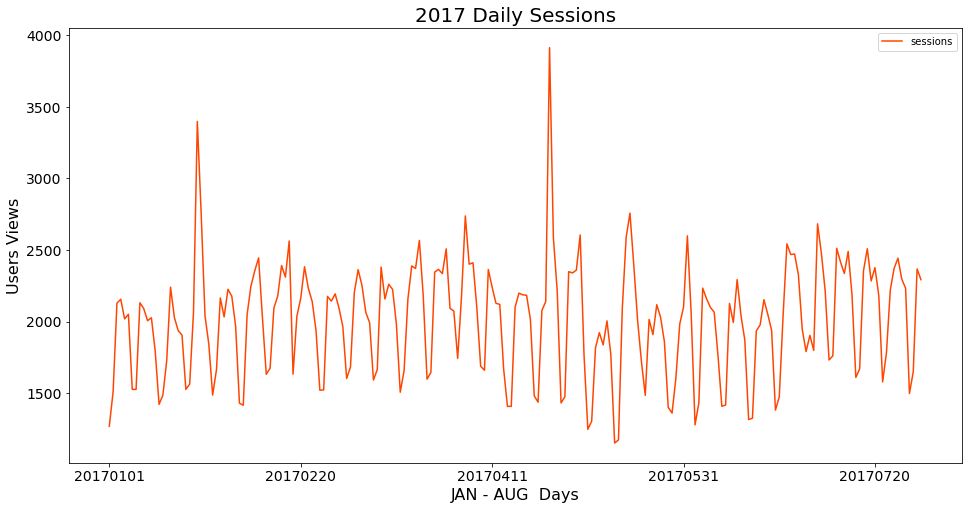

In [13]:
pageviews_per_day_df = pd.DataFrame(pageviews_per_day)
pageviews_per_day_df.set_index('sessions')
color = ['orangered']

pageviews_per_day_plot = pageviews_per_day_df.plot(figsize = (16, 8), kind='line', x="date", y="sessions", color=color)
plt.xlabel("JAN - AUG  Days", fontsize = 16)
plt.ylabel("Users Views", fontsize = 16)
plt.title("2017 Daily Sessions", fontsize = 20, color = 'k')
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.show()

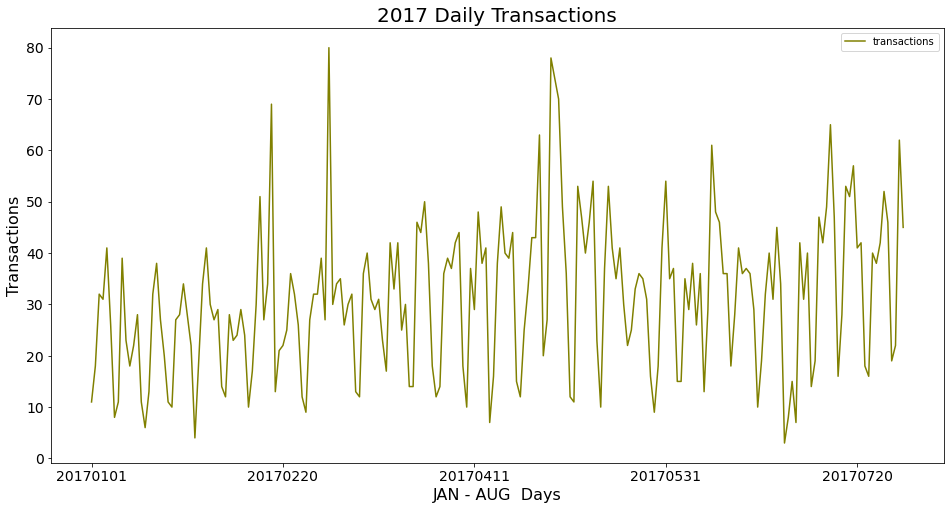

In [14]:
pageviews_per_day_df = pd.DataFrame(pageviews_per_day)
pageviews_per_day_df.set_index('sessions')
color = ['olive']

pageviews_per_day_plot = pageviews_per_day_df.plot(figsize = (16, 8), kind='line', x="date", y="transactions", color=color)
plt.xlabel("JAN - AUG  Days", fontsize = 16)
plt.ylabel("Transactions", fontsize = 16)
plt.title("2017 Daily Transactions", fontsize = 20, color = 'k')
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.show()

In [210]:
# Show the timespent by each user for the whole period

sql = """
        SELECT
          fullVisitorId AS users,
          totals.timeOnSite AS time_of_session
        FROM
          db_ecommerce
        GROUP BY
          fullVisitorId,
          totals.timeOnSite
        ORDER BY
          totals.timeOnSite DESC
        LIMIT
          10
       """
frequent_users = spark.sql(sql)
frequent_users

users,time_of_session
6957245643416321514,12136
1957458976293878100,11848
2969418676126258798,11316
2735916843202442631,10068
5208937953046059083,9772
5564610750564086192,9564
4691667039083430712,9520
1806046855786021685,9479
1957458976293878100,9435
2396848817613598114,9300


In [229]:
# Show user sessions with top transactions and total revenue 

sql = """
        SELECT
          DISTINCT fullVisitorId AS users,
          SUM(totals.transactions) AS transactions,
          SUM(totals.transactions) / COUNT(*) AS conversion_rate,
          SUM(totals.totalTransactionRevenue) / 1000000 AS total_revenue
        FROM
          db_ecommerce
        GROUP BY
          fullVisitorId
        ORDER BY
          transactions DESC
        LIMIT
          10  
      """
users_transaction_revenue = spark.sql(sql).toPandas()
users_transaction_revenue

,users,transactions,conversion_rate,total_revenue
0,7813149961404844386,32,0.463768,2697.15
1,5526675926038480325,25,25.000000,1938.09
2,1957458976293878100,22,0.150685,128412.52
3,4983264713224875783,21,5.250000,1576.33
4,8637158932301658318,15,15.000000,382.00
5,2402527199731150932,14,0.608696,2202.48
6,0608915197735218105,12,0.800000,3039.32
7,2396848817613598114,12,2.400000,1518.49
8,7713012430069756739,12,12.000000,1319.63
9,4921413806940784676,11,0.333333,1099.72


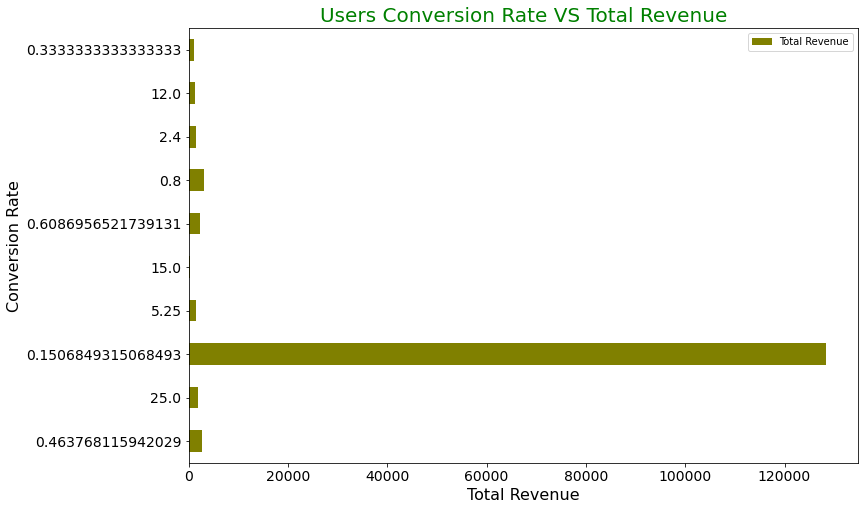

In [258]:
# Visualize 

users_transaction_revenue_df = pd.DataFrame(users_transaction_revenue)
conversion_rate = users_transaction_revenue['conversion_rate']
total_revenue = users_transaction_revenue['total_revenue']
conversion_revenue = {'Conversion Rate': conversion_rate, 'Total Revenue': total_revenue}
conversion_revenue_df = pd.DataFrame.from_dict(conversion_revenue)

conversion_revenue_plot = conversion_revenue_df.plot(figsize = (12, 8), kind='barh', x='Conversion Rate', y='Total Revenue', color="olive")
plt.xlabel("Total Revenue", fontsize = 16)
plt.ylabel("Conversion Rate", fontsize = 16)
plt.title("Users Conversion Rate VS Total Revenue", fontsize = 20, color = 'g')
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.show()

In [137]:
# Determine user sessions with high Bounce Rate 

sql = """
        SELECT
          fullVisitorId AS users,
          visitId,
          COUNT(*) AS sessions,
          sum(totals.bounces) / COUNT(*) AS bounce_rate
        FROM
          db_ecommerce
        GROUP BY
          users,
          visitId
        ORDER BY
          bounce_rate DESC
        LIMIT
          10
      """
users_bounce_rate = spark.sql(sql)
users_bounce_rate

users,visitId,sessions,bounce_rate
1464118866435322718,1493435952,1,1.0
7596855916472037617,1493614929,1,1.0
7549458195494611096,1492758019,1,1.0
0297018420074101211,1487724682,1,1.0
4714714555902550257,1490479887,1,1.0
7660377708313228942,1484754662,1,1.0
7035044035659755870,1491068552,1,1.0
3431362306097214306,1487167739,1,1.0
6475984486122752415,1487321937,1,1.0
436486178014637646,1498216835,1,1.0


In [132]:
# Determine Users with high Exit Rate

sql = """
        SELECT
          fullVisitorId AS users,
          visitId,
          COUNT(*) AS views,
          SUM(totals.bounces) / COUNT(*) AS exit_rate
        FROM
          db_ecommerce
        GROUP BY
          users,
          visitId
        ORDER BY
          exit_rate ASC
        LIMIT
          10
      """
users_exit_rate = spark.sql(sql)
users_exit_rate

users,visitId,views,exit_rate
6604862402043138486,1494799463,1,null
9148167346814274414,1496698379,1,null
9609104828919391966,1495838816,1,null
9446297351559825194,1493497352,1,null
9387513564437162701,1491685757,1,null
2486238973615425743,1483627716,1,null
0575917765333661923,1490266145,1,null
9924165574549418396,1488703977,1,null
25404210472994637,1487335476,1,null
7972147770200170376,1488337753,1,null


In [98]:
# determine the traffic type, quality and transactions and revenue

sql = """
        SELECT
          trafficSource.medium,
          COUNT(*) AS sessions,
          SUM(totals.bounces) / COUNT(*) AS exit_rate,
          SUM(totals.transactions) AS transactions,
          SUM(totals.totalTransactionRevenue) / 1000000 AS total_revenue,
          SUM(totals.transactions) / COUNT(*) AS conversion_rate
        FROM
          db_ecommerce
        GROUP BY
          medium
        ORDER BY
          total_revenue DESC
      """
traffic_quality = spark.sql(sql)
traffic_quality

medium,sessions,exit_rate,transactions,total_revenue,conversion_rate
(none),189445,0.43964211248647367,4697,716676.81,0.024793475678956952
organic,173428,0.5145305256359988,1496,146596.91,0.008626058075973891
cpm,3226,0.37414755114693116,90,121005.71,0.027898326100433975
referral,82023,0.6179364324640649,180,23344.29,0.002194506418931...
cpc,9265,0.38672423097679437,176,20732.75,0.01899622234214787
affiliate,9761,0.5699211146398935,6,558.67,6.14691117713349E-4
(not set),112,0.44642857142857145,1,11.99,0.008928571428571428


In [259]:
# Show the action type count 

sql = """
      SELECT 
      CASE 
         WHEN action_type = '1' THEN 'Click through of product lists'
         WHEN action_type = '2' THEN 'Product detail views'
         WHEN action_type = '5' THEN 'Check out'
         WHEN action_type = '6' THEN 'Completed purchase'
         ELSE 'Other action types'
      END AS action_types,
      COUNT(e.fullVisitorId) AS views
      FROM db_sessions s
      INNER JOIN db_ecommerce e
      ON s.fullVisitorId = e.fullVisitorId
      GROUP BY action_types
      ORDER BY views ASC
      """
action_type = spark.sql(sql).toPandas()
action_type

,action_types,views
0,Completed purchase,233997
1,Product detail views,592187
2,Click through of product lists,771367
3,Check out,890174
4,Other action types,21453028


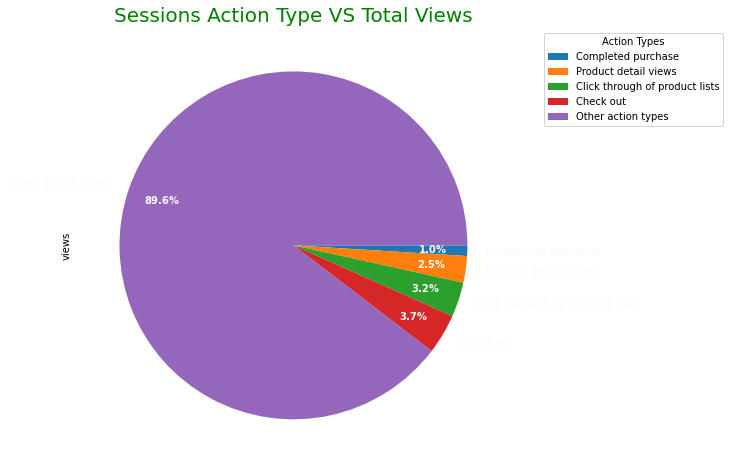

In [500]:
action_type_df = pd.DataFrame(action_type)
action_type_df.set_index('action_types', inplace=True)


explode = (0, 0.1, 0, 0)
action_type_plot = action_type_df.plot(figsize = (12, 8), kind='pie', autopct='%1.1f%%',x="action_types",pctdistance=0.8,textprops=dict(color="snow", weight="bold"), y="views",counterclock=False)
plt.legend(title="Action Types", loc="upper right", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("Sessions Action Type VS Total Views", fontsize = 20, color = 'g')
plt.show()

In [281]:
# Show and Visualise the total revenue for month 

sql = """
        SELECT
          CASE
            WHEN date BETWEEN '20170801'
            AND '20170831' THEN 'August'
            WHEN date BETWEEN '20170701'
            AND '20170731' THEN 'July'
            WHEN date BETWEEN '20170601'
            AND '20170630' THEN 'June'
            WHEN date BETWEEN '20170501'
            AND '20170531' THEN 'May'
            WHEN date BETWEEN '20170401'
            AND '20170430' THEN 'April'
            WHEN date BETWEEN '20170301'
            AND '20170331' THEN 'March'
            WHEN date BETWEEN '20170201'
            AND '20170228' THEN 'February'
            WHEN date BETWEEN '20170101'
            AND '20170131' THEN 'January'
          END AS 2017_sessions,
          CASE
            WHEN date BETWEEN '20170801'
            AND '20170831' THEN 8
            WHEN date BETWEEN '20170701'
            AND '20170731' THEN 7
            WHEN date BETWEEN '20170601'
            AND '20170630' THEN 6
            WHEN date BETWEEN '20170501'
            AND '20170531' THEN 5
            WHEN date BETWEEN '20170401'
            AND '20170430' THEN 4
            WHEN date BETWEEN '20170301'
            AND '20170331' THEN 3
            WHEN date BETWEEN '20170201'
            AND '20170228' THEN 2
            WHEN date BETWEEN '20170101'
            AND '20170131' THEN 1
          END AS monthly_sessions,
          COUNT(*) AS sessions,
          SUM(totals.totalTransactionRevenue) / 1000000 AS monthly_revenue
        FROM
          db_ecommerce
        GROUP BY
          2017_sessions,
          monthly_sessions
        ORDER BY
          monthly_sessions
      """
monthly_revenue = spark.sql(sql).toPandas()
monthly_revenue

,2017_sessions,monthly_sessions,sessions,monthly_revenue
0,January,1,64694,106248.15
1,February,2,62192,116111.60
2,March,3,69931,150224.70
3,April,4,67126,222767.98
4,May,5,65371,135952.00
5,June,6,63578,127992.84
6,July,7,71812,160739.86
7,August,8,2556,8890.00


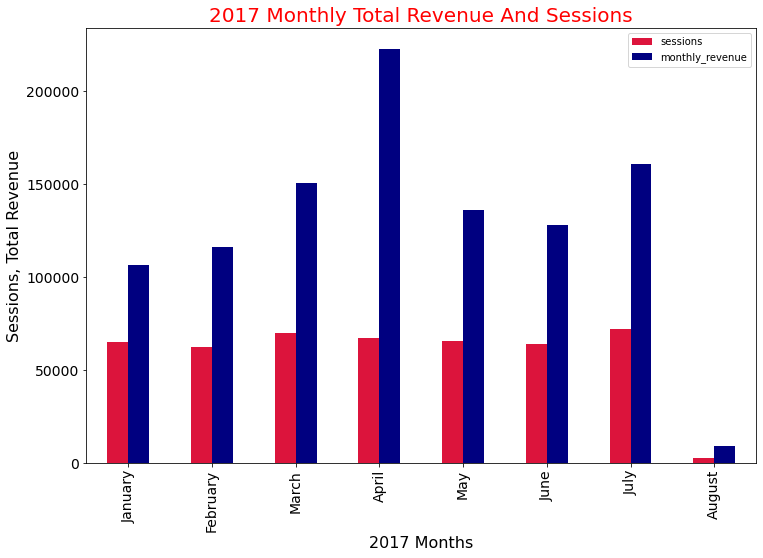

In [302]:
monthly_revenue_df = pd.DataFrame(monthly_revenue)
monthly_revenue_df.set_index('2017_sessions')
color = ['crimson', 'navy']

monthly_revenue_plot = monthly_revenue_df.plot(figsize = (12, 8), kind='bar', x="2017_sessions", y=["sessions","monthly_revenue"], color=color)
plt.xlabel("2017 Months", fontsize = 16)
plt.ylabel("Sessions, Total Revenue", fontsize = 16)
plt.title("2017 Monthly Total Revenue And Sessions", fontsize = 20, color = 'r')
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.show()

In [303]:
# Show and visualise popular pages and their bounce rate

sql = """
        SELECT
          pagePath as landing_page,
          COUNT(*) as views,
          SUM(totals.bounces) / COUNT(*) AS bounce_rate
        FROM
          db_sessions s
          INNER JOIN db_ecommerce e ON s.fullVisitorId = e.fullVisitorId
        WHERE
          s.hitNumber = 1
          AND s.type = 'PAGE'
        GROUP BY
          landing_page
        ORDER BY
          views DESC
        LIMIT
          10
      """

popular_pages = spark.sql(sql).toPandas()
popular_pages

,landing_page,views,bounce_rate
0,/google+redesign/shop+by+brand/youtube,1139725,0.577687
1,/google+redesign/apparel/mens/mens+t+shirts,327000,0.551413
2,/google+redesign/bags,143400,0.445941
3,/google+redesign/apparel/kid+s/kid+s+toddler,128424,0.867875
4,/google+redesign/drinkware,125520,0.526864
5,/google+redesign/apparel,123204,0.422908
6,/google+redesign/apparel/men++s/men++s+t+shirts,117192,0.467540
7,/google+redesign/electronics,85428,0.553729
8,/google+redesign/apparel/headgear,73321,0.506922
9,/google+redesign/apparel/mens/mens+outerwear,68224,0.493360


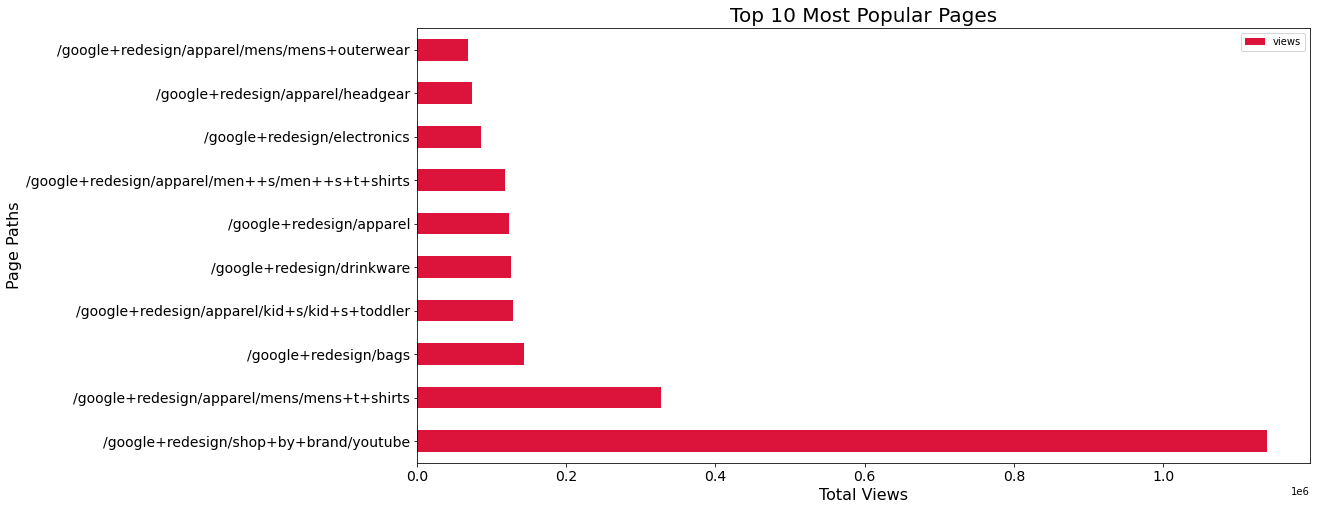

In [405]:
# Show and visualise bounce rate of pages

popular_pages_df = pd.DataFrame(popular_pages)
popular_pages_df.set_index('landing_page')
color = ['crimson']

popular_pages_plot = popular_pages_df.plot(figsize = (16, 8), kind='barh', x="landing_page", y="views", color=color)
plt.xlabel("Total Views", fontsize = 16)
plt.ylabel("Page Paths", fontsize = 16)
plt.title("Top 10 Most Popular Pages", fontsize = 20, color = 'k')
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.show()

In [460]:
# Analyse and compare action type with products and transactions

sql = """
        SELECT
          DISTINCT v2productName AS products,
          SUM(e.totals.transactions) AS complete_transactions,
          action_type
        FROM
          db_sessions s
          INNER JOIN db_ecommerce e ON e.fullVisitorId = s.fullVisitorId
        WHERE
          action_type == "6"
        GROUP BY
          action_type,
          v2productName
        ORDER BY
          complete_transactions DESC
        LIMIT
          10
      """

products_transactions = spark.sql(sql).toPandas()
products_transactions

,products,complete_transactions,action_type
0,Google Sunglasses,2852,6
1,Google 22 oz Water Bottle,2069,6
2,Recycled Paper Journal Set,1760,6
3,Google Men's 100% Cotton Short Sleeve Hero Tee...,1414,6
4,Google Men's 100% Cotton Short Sleeve Hero Tee...,1372,6
5,Google Laptop and Cell Phone Stickers,1300,6
6,Google Men's Vintage Badge Tee Black,1240,6
7,Google Men's Zip Hoodie,1170,6
8,Google Men's 100% Cotton Short Sleeve Hero Tee...,1030,6
9,BLM Sweatshirt,990,6


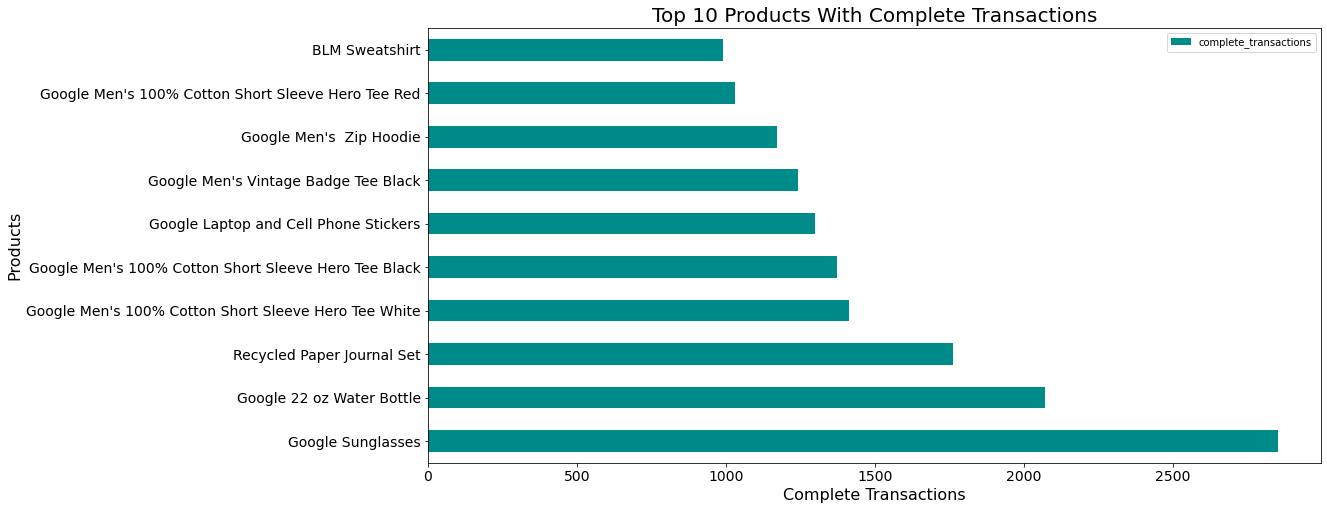

In [461]:
products_transactions_df = pd.DataFrame(products_transactions)
products_transactions_df.set_index('products')
color = ['darkcyan']

products_transactions_plot = products_transactions_df.plot(figsize = (16, 8), kind='barh', x="products", y="complete_transactions", color=color)
plt.xlabel("Complete Transactions", fontsize = 16)
plt.ylabel("Products", fontsize = 16)
plt.title("Top 10 Products With Complete Transactions", fontsize = 20, color = 'k')
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.show()

In [453]:
# Determine device browser bounce rate

sql = """
        SELECT
          device.browser as user_browser,
          COUNT(device.browser) AS browser_count,
          SUM(totals.bounces) / COUNT(*) AS bounce_rate
        FROM
          db_ecommerce
        GROUP BY
          user_browser
        ORDER BY
          browser_count DESC
        LIMIT
          10
      """
browsers_bounce_rate = spark.sql(sql).toPandas()
browsers_bounce_rate

,user_browser,browser_count,bounce_rate
0,Chrome,331324,0.474557
1,Safari,75598,0.512289
2,Firefox,20705,0.626467
3,Internet Explorer,11094,0.646295
4,Android Webview,7134,0.572470
5,Edge,5993,0.573502
6,Safari (in-app),4780,0.602510
7,Opera Mini,3736,0.695931
8,Opera,2376,0.595539
9,UC Browser,1647,0.676988


In [9]:
# Identify Top 10 Countries with most sessions
sql = """
      SELECT geoNetwork.country as country,
             COUNT(*) AS sessions_country_count
      FROM db_ecommerce
      GROUP BY country
      ORDER BY sessions_country_count DESC
      LIMIT 10
      """

country_count = spark.sql(sql).toPandas()
country_count

,country,sessions_country_count
0,United States,206188
1,India,29249
2,United Kingdom,23248
3,Canada,14805
4,Germany,12252
5,Japan,11461
6,France,9754
7,Australia,7783
8,Taiwan,7737
9,Spain,7423


# Cleaning,  Feature Selection And Engineering

In [6]:
# manual selection of columns
sql = """
      SELECT e.fullVisitorId, e.visitId, e.totals.timeOnSite AS timeOnSite,
      e.totals.transactions, totals.sessionQualityDim, s.hitNumber, s.action_type, 
      s.isInteraction, s.isImpression, s.type, s.v2productName
      FROM db_ecommerce e
      INNER JOIN db_sessions s 
      ON e.fullVisitorId = s.fullVisitorId
      """
df = spark.sql(sql)

In [7]:
df.limit(5).toPandas()

,fullVisitorId,visitId,timeOnSite,transactions,sessionQualityDim,hitNumber,action_type,isInteraction,isImpression,type,v2productName
0,3502442948772950032,1488230102,NaN,NaN,NaN,1,0,True,True,PAGE,YouTube Trucker Hat
1,3502442948772950032,1488230102,NaN,NaN,NaN,1,0,True,True,PAGE,22 oz YouTube Bottle Infuser
2,3502442948772950032,1488230102,NaN,NaN,NaN,1,0,True,True,PAGE,YouTube Wool Heather Cap Heather/Black
3,3502442948772950032,1488230102,NaN,NaN,NaN,1,0,True,True,PAGE,YouTube Leatherette Notebook Combo
4,3502442948772950032,1488230102,NaN,NaN,NaN,1,0,True,True,PAGE,YouTube Custom Decals


In [47]:
# Show the descriptive statistics of the columns

df.describe()

summary,fullVisitorId,visitId,timeOnSite,transactions,sessionQualityDim,hitNumber,action_type,type,v2productName
count,23940753,23940753,18398497,1524974,3364525,23940753,23940753,23940753,23940753
mean,4.346174917730680...,1.4924587152520552E9,619.5378812736715,1.1650434695935799,15.215697609618,15.207925373107521,0.37593065681768656,null,null
stddev,3.029971757228514...,5212899.201659691,973.4284566798938,1.164127280084451,26.297040711036566,25.545082972444316,1.1950368237813205,null,null
min,0000027376579751715,1483257208,1,1,1,1,0,EVENT,1 oz Hand Sanitizer
max,9999986437109498564,1501657190,12136,25,99,500,6,PAGE,YouTube Youth Sho...


In [8]:
# Check for missing and null values in the columns selected

df_pandas = df.toPandas()
df_pandas

21/11/01 00:03:56 ERROR Executor: Exception in task 2.0 in stage 2.0 (TID 7)/ 5]
java.lang.OutOfMemoryError: Java heap space
	at java.base/java.util.Arrays.copyOf(Arrays.java:3745)
	at java.base/java.io.ByteArrayOutputStream.grow(ByteArrayOutputStream.java:120)
	at java.base/java.io.ByteArrayOutputStream.ensureCapacity(ByteArrayOutputStream.java:95)
	at java.base/java.io.ByteArrayOutputStream.write(ByteArrayOutputStream.java:156)
	at net.jpountz.lz4.LZ4BlockOutputStream.flushBufferedData(LZ4BlockOutputStream.java:223)
	at net.jpountz.lz4.LZ4BlockOutputStream.write(LZ4BlockOutputStream.java:176)
	at java.base/java.io.DataOutputStream.write(DataOutputStream.java:107)
	at org.apache.spark.sql.catalyst.expressions.UnsafeRow.writeToStream(UnsafeRow.java:539)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$getByteArrayRdd$1(SparkPlan.scala:348)
	at org.apache.spark.sql.execution.SparkPlan$$Lambda$2953/0x0000000841698840.apply(Unknown Source)
	at org.apache.spark.rdd.RDD.$anonfun$mapPar

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Chained exceptions have been truncated to avoid stack overflow in traceback formatting:
Traceback (most recent call last):
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1115, in start
    self.socket.connect((self.address, self.port))
ConnectionRefusedError: [Errno 111] Connection refused

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 977, in _get_connection
    connection = self.deque.pop()
IndexError: pop from an empty deque

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1115, in start
    self.socket.connect((self.address, self.port))
ConnectionRefusedError: [Errno 

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Chained exceptions have been truncated to avoid stack overflow in traceback formatting:
Traceback (most recent call last):
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 977, in _get_connection
    connection = self.deque.pop()
IndexError: pop from an empty deque

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1115, in start
    self.socket.connect((self.address, self.port))
ConnectionRefusedError: [Errno 111] Connection refused

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 977, in _get_connection
    connection = self.deque.pop()
IndexError: pop from an empty deque

Du

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:33445)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_36/1937217295.py", line 3, in <module>
    df_pandas = df.toPandas()
  File "/usr/local/spark/python/pyspark/sql/pandas/conversion.py", line 141, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/usr/local/spark/python/pyspark/sql/dataframe.py", line 677, in collect
    sock_info = self._jdf.collectToPython()
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1304, in __call__
    return_value = get_return_value(
  File "/usr/local/spark/python/pyspark/sql/utils.py", line 111, in deco
    return f(*a, **kw)
  File "/usr/local/spark/python/lib/py4j-0.10.9-src.zip/py4j/protocol.py", line 326, in g

Py4JNetworkError: An error occurred while trying to connect to the Java server (127.0.0.1:33445)

In [ ]:
# Decide what to do with missing and null values

In [ ]:
# Create Input and Output Fields

In [ ]:
# Perform Correlation of input and output fields

In [ ]:
# Determine final input and output field

In [ ]:
# Prepare data for analysis, splitting into train, test and validation

# Machine Learning Modelling and Analysis

In [ ]:
# Choose and Determine Models 

In [ ]:
# Train model(s)

In [ ]:
# Determine model(s) performance, Compare model(s) results

In [ ]:
# Visualise model results

In [ ]:
# Visualise model performance

In [ ]:
# Save model for future Use